In [3]:
import networkx as nx
import random
import matplotlib.pyplot as plt

In [37]:
# Create a graph
#G = nx.erdos_renyi_graph(n=100, p=0.05, seed=42)
#G = nx.barabasi_albert_graph(n=100,m=1)
G = nx.karate_club_graph()

In [38]:
# Assign random attributes to each node
colors = ["red", "blue", "green"]
for node in G.nodes():
    # Set a random color
    G.nodes[node]['color'] = random.choice(colors)  
    # Set a random numeric attribute (e.g., between 0 and 10)
    G.nodes[node]['weight'] = random.uniform(0, 10)

In [45]:
# Assign attributes according to degree
# Define thresholds for low, medium, and high degree nodes
degrees = dict(G.degree())
max_degree = max(degrees.values())
low_threshold = max_degree / 3
high_threshold = 2 * max_degree / 3

# Assign nodes to groups based on their degree
for node, degree in degrees.items():
    G.nodes[node]['weight'] = random.uniform(0, 10)
    if degree <= low_threshold:
        G.nodes[node]['color'] = "green"  # Low degree
    elif degree <= high_threshold:
        G.nodes[node]['color'] =  "blue" # Medium degree
    else:
        G.nodes[node]['color'] = "red" # High degree

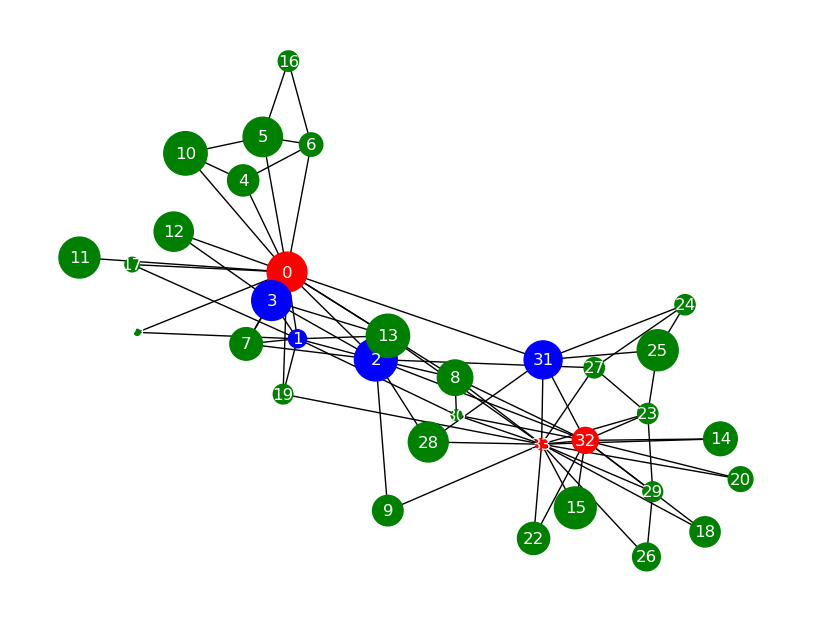

In [43]:
# Draw the graph using colors and sizes based on attributes
node_colors = [attrs['color'] for _, attrs in G.nodes(data=True)]
node_sizes = [attrs['weight'] * 100 for _, attrs in G.nodes(data=True)]  # Scale the weight for visualization

plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color=node_colors, node_size=node_sizes, font_color="white")
plt.show()

In [46]:
# Calculate assortativity
degree_assortativity = nx.degree_assortativity_coefficient(G)
nominal_assortativity = nx.attribute_assortativity_coefficient(G,'color')
numeric_assortativity = nx.numeric_assortativity_coefficient(G,'weight')
print(f"Degree Assortativity Coefficient: {degree_assortativity:.3f}")
print(f"Nominal Assortativity Coefficient: {nominal_assortativity:.3f}")
print(f"Numeric Assortativity Coefficient: {numeric_assortativity:.3f}")

Degree Assortativity Coefficient: -0.476
Nominal Assortativity Coefficient: -0.273
Numeric Assortativity Coefficient: 0.006
